## Marginal mix from time-series forecasting

In [24]:
import prophet
from utils import create_predictions,marginal_supply
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bw_processing as bwp
import bw2data as bd
import bw2calc as bc
from tqdm import tqdm

c:\Users\migue\Anaconda3\envs\hyper\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1) generate marginal electricity mixes

In [27]:
iea_path = Path().cwd().parent / 'data' / 'IEA'/'Electricity generation by source - Spain.csv'
assert iea_path.exists()

In [28]:
elec_ts = pd.read_csv(iea_path,index_col=0).fillna(0).drop('Units',axis=1)
elec_ts.index = pd.to_datetime(elec_ts.index,format='%Y')
elec_ts.index.name = 'ds'
elec_ts.columns.name = 'case'
elec_ts = elec_ts.stack().to_frame('y').reset_index()

In [29]:
elec_ts.head()

,ds,case,y
0,1990-01-01,Coal,60663.0
1,1990-01-01,Oil,8604.0
2,1990-01-01,Natural gas,1509.0
3,1990-01-01,Biofuels,462.0
4,1990-01-01,Waste,210.0


In [30]:
predictions_df = create_predictions(elec_ts)

10:44:32 - cmdstanpy - INFO - Chain [1] start processing
10:44:32 - cmdstanpy - INFO - Chain [1] done processing
10:44:33 - cmdstanpy - INFO - Chain [1] start processing
10:44:33 - cmdstanpy - INFO - Chain [1] done processing
DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: C:\Users\migue\AppData\Local\Temp\tmpho4eeyav\22y74s66.json
DEBUG:cmdstanpy:input tempfile: C:\Users\migue\AppData\Local\Temp\tmpho4eeyav\tz9o4ync.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\migue\\Anaconda3\\envs\\hyper\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 

<Axes: xlabel='ds'>

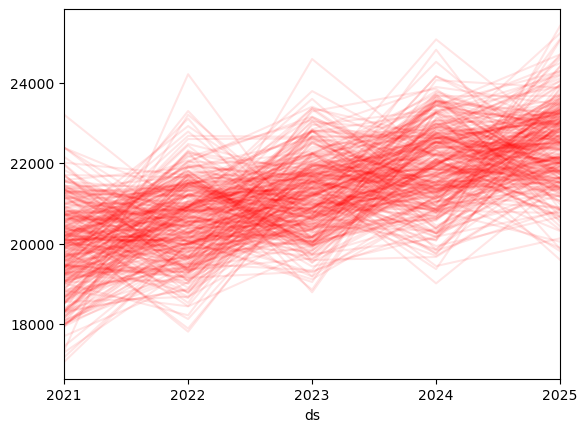

In [31]:
predictions_df['Solar PV'].unstack('case').sample(300,
axis=1).plot(legend=False,color='red',alpha=0.1)

<Axes: xlabel='ds'>

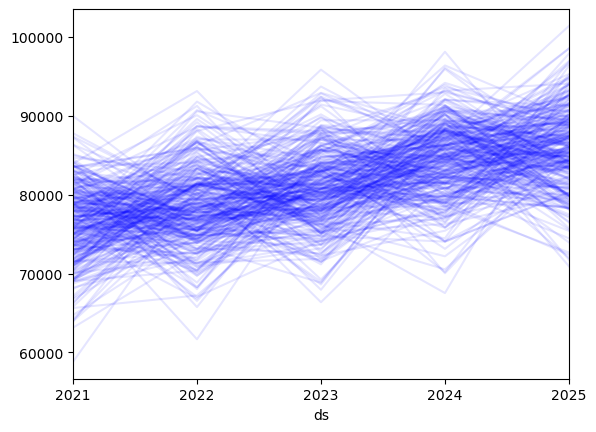

In [ ]:
predictions_df['Natural gas'].unstack('case').sample(300,
axis=1).plot(legend=False,color='blue',alpha=0.1)

In [32]:
market_share = marginal_supply(predictions_df)
market_share

case,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
subject,,,,,,,,,,,,,,,,,,,,,
Biofuels,0.013722,0.016090,0.016745,0.015955,0.023356,0.062144,0.051974,0.007679,0.000000,0.066187,...,0.013571,0.020112,0.011231,0.031905,0.014065,0.010386,0.008238,0.014584,0.020487,0.021079
Hydro,0.055756,0.000000,0.000000,0.214713,0.228914,0.000000,0.000000,0.162473,0.000000,0.379871,...,0.000000,0.000000,0.080002,0.000000,0.000000,0.000000,0.000000,0.152199,0.054532,0.127886
Natural gas,0.624245,0.586946,0.316350,0.288503,0.335980,0.213638,0.198977,0.370949,0.000000,0.000000,...,0.648047,0.524179,0.443271,0.000000,0.501302,0.720980,0.070098,0.252274,0.567257,0.415067
Nuclear,0.046265,0.070946,0.239509,0.069234,0.024499,0.080936,0.182473,0.045859,0.300196,0.004977,...,0.025482,0.018330,0.017497,0.035125,0.044146,0.040821,0.219572,0.010079,0.092945,0.070095
Oil,0.023523,0.000000,0.041331,0.040327,0.001408,0.000000,0.079496,0.000000,0.066965,0.000000,...,0.053882,0.000000,0.032022,0.239738,0.022187,0.003433,0.000000,0.000000,0.022518,0.114275
Other sources,0.000000,0.000000,0.000000,0.015518,0.009756,0.000000,0.000000,0.007884,0.000000,0.054634,...,0.000000,0.004267,0.000000,0.000000,0.018084,0.018549,0.000000,0.000000,0.003831,0.022704
Solar PV,0.085814,0.031251,0.117065,0.105391,0.110945,0.276405,0.000000,0.102697,0.000000,0.016968,...,0.056846,0.185119,0.127260,0.013661,0.084465,0.045278,0.268097,0.274234,0.098941,0.073924
Solar thermal,0.039136,0.022815,0.032467,0.000772,0.014828,0.000000,0.036937,0.060114,0.123975,0.212841,...,0.000000,0.042152,0.060291,0.000000,0.070798,0.029637,0.099976,0.017701,0.000000,0.020431
Waste,0.005576,0.005465,0.011115,0.016039,0.007856,0.017049,0.022416,0.005910,0.018202,0.031588,...,0.003995,0.010246,0.010833,0.016183,0.009813,0.006189,0.013363,0.010530,0.007230,0.006696


In [33]:
market_share = market_share.drop('Other sources')
market_share = market_share.div(market_share.sum())

## 2) LCA calculation

now we calculate the LCA score using those marginal electricity mixes. We do it both taking into account the uncertainty of the background database or dissregarding it. This is for illustrative purposes. 

To reproduce this we need a project with ecoinvent available. We've used ecoinvent, because it is a widely used background LCA database, facilitating the reproducibility of the procedure

In [37]:
bd.projects.set_current('hypercog')
ecoinvent = bd.Database('ei_391con')

In [43]:
wind = ecoinvent.get_node(location='ES',name='electricity production, wind, >3MW turbine, onshore')
biomass = ecoinvent.get_node(location='ES',
name='electricity, from municipal waste incineration to generic market for electricity, medium voltage')
ng = ecoinvent.get_node(location='ES',name='electricity production, natural gas, combined cycle power plant')
nuclear = ecoinvent.get_node(location='ES',name='electricity production, nuclear, boiling water reactor')
oil = ecoinvent.get_node(location='ES',name='electricity production, oil')
solar_pv = ecoinvent.get_node(location='ES',
name='electricity production, photovoltaic, 570kWp open ground installation, multi-Si')
solar_thermal = ecoinvent.get_node(location='ES',
name='electricity production, solar thermal parabolic trough, 50 MW')
waste = ecoinvent.get_node(location='ES',
name='electricity, from municipal waste incineration to generic market for electricity, medium voltage')
hydro = ecoinvent.get_node(location='ES',
name='electricity production, hydro, pumped storage')

In [98]:
mapping_ecoinvent = {'Biofuels':biomass,'Hydro':hydro,'Natural gas':ng,
                     'Nuclear':nuclear,'Oil':oil,'Solar PV':solar_pv,
                     'Solar thermal':solar_thermal,'Waste':biomass,'Wind':wind
}

In [70]:
if 'marginal_example' in bd.databases:
    print('db already created')
    elec_market = bd.get_node(database='marginal_example',code='elec')

else:
    print('creating example db')
    example_db = bd.Database('marginal_example')
    example_db.register()

    elec_market = example_db.new_node(code='elec',name='marginal electricity market')
    elec_market.save()

    elec_market.new_edge(input=hydro,amount=0,type='technosphere').save()
    elec_market.new_edge(input=biomass,amount=0,type='technosphere').save()
    elec_market.new_edge(input=nuclear,amount=0,type='technosphere').save()
    elec_market.new_edge(input=oil,amount=0,type='technosphere').save()
    elec_market.new_edge(input=solar_pv,amount=0,type='technosphere').save()
    elec_market.new_edge(input=solar_thermal,amount=0,type='technosphere').save()
    elec_market.new_edge(input=wind,amount=0,type='technosphere').save()

    elec_market.new_edge(input=ng,amount=1,type='technosphere').save()

db already created


In [78]:
gwp100 = ('IPCC 2021', 'climate change', 'global warming potential (GWP100)')

### background uncertainty only

In [151]:
lca = bc.LCA({elec_market:1},gwp100,use_distributions=True)
lca.lci()
lca.lcia()

In [152]:
results_bkg = []
for _ in range(100):
    next(lca)
    results_bkg.append(lca.score)

create a datapackage with the marginal electricity mix

In [100]:
market_share.index = market_share.index.map(lambda x:mapping_ecoinvent[x].id)
# aggregate when mapping to the same
market_share = market_share.groupby(market_share.index).sum()
market_share = pd.concat({elec_market.id:market_share},names=['output','input']).swaplevel().T

In [133]:
marginal_mix_dp = bwp.create_datapackage()

In [154]:
market_share.columns.values.astype(bwp.INDICES_DTYPE)

array([(35584, 68166), (41226, 68166), (41541, 68166), (42731, 68166),
       (42966, 68166), (49759, 68166), (50811, 68166), (52840, 68166)],
      dtype=[('row', '<i4'), ('col', '<i4')])

In [134]:
marginal_mix_dp.add_dynamic_array(
matrix='technosphere_matrix',
interface=market_share.values.T,
indices_array=market_share.columns.values.astype(bwp.INDICES_DTYPE),
flip_array = np.full(market_share.columns.shape, True)) 

In [111]:
fu, data_objs , _ = bd.prepare_lca_inputs({elec_market:1},method=gwp100)
lca = bc.LCA(demand=fu,method=gwp100,
    data_objs=data_objs + [marginal_mix_dp],
    use_arrays=True,
    )

In [135]:
lca.lci()
lca.lcia()
result_basic = []
for i in tqdm(range(100)):
    next(lca)
    result_basic.append(lca.score)

100%|██████████| 100/100 [09:36<00:00,  5.76s/it]


In [136]:
fu, data_objs , _ = bd.prepare_lca_inputs({elec_market:1},method=gwp100)
lca_background_uncertainty = bc.LCA(demand=fu,method=gwp100,
    data_objs=data_objs + [marginal_mix_dp],
    use_arrays=True,use_distributions=True
    )

In [137]:
lca_background_uncertainty.lci()
lca_background_uncertainty.lcia()
result_bkg_uncert = []
for i in tqdm(range(100)):
    next(lca_background_uncertainty)
    result_bkg_uncert.append(lca_background_uncertainty.score)

100%|██████████| 100/100 [09:08<00:00,  5.48s/it]


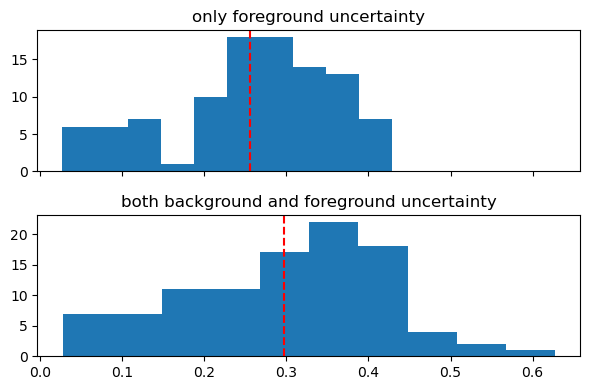

In [150]:
f,(a1,a2) = plt.subplots(ncols=1,nrows=2,sharex=True,figsize=(6,4))

_ = a1.hist(result_basic)
_ = a2.hist(result_bkg_uncert)

a1.set_title('only foreground uncertainty')
a2.set_title('both background and foreground uncertainty')

a1.axvline(np.mean(result_basic),color='r',ls='--',label='mean')
a2.axvline(np.mean(result_bkg_uncert),color='r',ls='--',label='mean')

plt.tight_layout()